## Задание

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,
- Так как здесь цена зависит __от времени__, а __не от геолокации__, можно сказать, что этот набор является __временным рядом__.
    
б) скорость полета самолета при перелете из аэропорта А в аэропорт В,<br>
- Здесь говорится __не об изменении скорости__, а в общем о скорости, как о какой то величине. По этому это __не временной ряд__.

в) количество отказов компьютера,
- Здесь тоже говорится о какой то величине, без привязки ко времени. Поэтому это __не временной ряд__.

г) число обращений в поликлинику по району,
- Здесь тоже говорится о какой то величине, без привязки ко времени. Поэтому это __не временной ряд__.
    
д) координаты автобуса при движении по маршруту,
- Автобус __меняем местоположение__ с течением времени, поэтому этот набор можно рассматривать как __временной ряд__.
    
е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
- Фигура нарушитель завиксированный на камеру __меняем свое местоположение__ с течением времени, поэтому этот набор можно рассматривать как __временной ряд__.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
# load libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# warnings off
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df_DUQ = pd.read_csv('DUQ_hourly.csv', index_col=0, parse_dates=['Datetime'])
df_DUQ.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
df_DUQ.info() # information about columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
# check int type
(df_DUQ['DUQ_MW'].astype('int') != df_DUQ['DUQ_MW']).sum()

0

In [5]:
# retyping
df_DUQ['DUQ_MW'] = df_DUQ['DUQ_MW'].astype('int16')
df_DUQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null int16
dtypes: int16(1)
memory usage: 1.1 MB


In [6]:
df_DUQ.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [7]:
df_DUQ[(df_DUQ['DUQ_MW'] == df_DUQ['DUQ_MW'].max()) | 
       (df_DUQ['DUQ_MW'] == df_DUQ['DUQ_MW'].min())]

,DUQ_MW
Datetime,
2012-06-29 14:00:00,3054
2015-04-27 06:00:00,1014


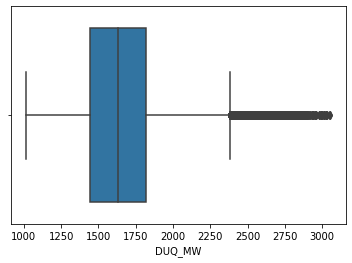

In [8]:
# view boxplot
sns.boxplot(df_DUQ['DUQ_MW'])
plt.show()

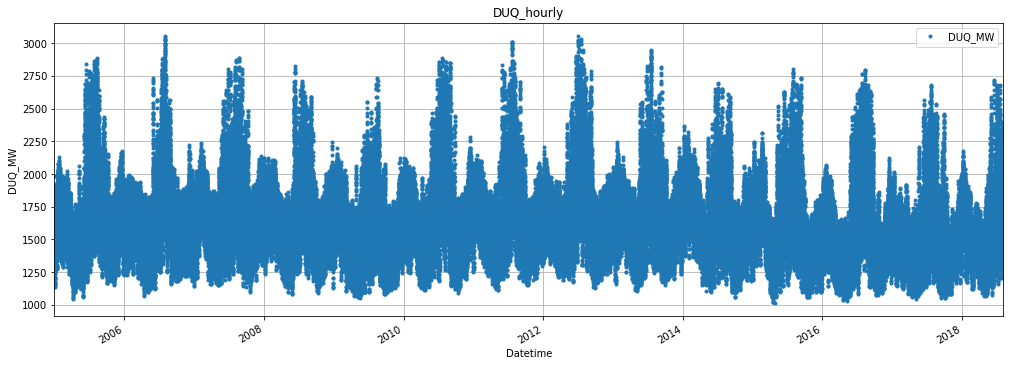

In [9]:
# view scatter 
df_DUQ.plot(style='.', figsize=(17, 6), title='DUQ_hourly', grid=True)

plt.ylabel('DUQ_MW')
plt.show()

In [10]:
# get 2 weeks into october 2005
df_DUQ_2005_10_2week = df_DUQ[(df_DUQ.index.year == 2005) & 
                              (df_DUQ.index.month == 2) &
                              (df_DUQ.index.day >= 6) & (df_DUQ.index.day <= 19)]
df_DUQ_2005_10_2week.head()

,DUQ_MW
Datetime,
2005-02-19 01:00:00,1586
2005-02-19 02:00:00,1539
2005-02-19 03:00:00,1506
2005-02-19 04:00:00,1490
2005-02-19 05:00:00,1507


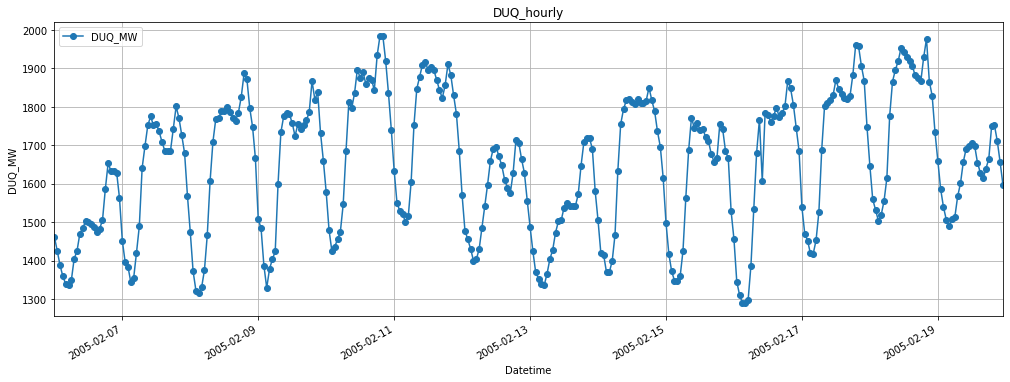

In [11]:
# view those 2 weeks
df_DUQ_2005_10_2week.plot(style='o-', figsize=(17,6), title='DUQ_hourly', grid=True)

plt.ylabel('DUQ_MW')
plt.show()

In [12]:
# shift indexes into columns
df_DUQ_dt = df_DUQ.copy()
df_DUQ_dt['Datetime'] = df_DUQ_dt.index
df_DUQ_dt.head()

,DUQ_MW,Datetime
Datetime,,
2005-12-31 01:00:00,1458,2005-12-31 01:00:00
2005-12-31 02:00:00,1377,2005-12-31 02:00:00
2005-12-31 03:00:00,1351,2005-12-31 03:00:00
2005-12-31 04:00:00,1336,2005-12-31 04:00:00
2005-12-31 05:00:00,1356,2005-12-31 05:00:00


In [13]:
# viewing un unique dates
count_dt = df_DUQ_dt['Datetime'].value_counts()
print('Разница между общими и уникальными значениями =', (count_dt > 1).sum())

Разница между общими и уникальными значениями = 4


In [14]:
df_DUQ_dt[count_dt > 1]

,DUQ_MW,Datetime
Datetime,,
2014-11-02 02:00:00,1272,2014-11-02 02:00:00
2014-11-02 02:00:00,1240,2014-11-02 02:00:00
2015-11-01 02:00:00,1113,2015-11-01 02:00:00
2015-11-01 02:00:00,1138,2015-11-01 02:00:00
2016-11-06 02:00:00,1121,2016-11-06 02:00:00
2016-11-06 02:00:00,1107,2016-11-06 02:00:00
2017-11-05 02:00:00,1131,2017-11-05 02:00:00
2017-11-05 02:00:00,1105,2017-11-05 02:00:00


In [15]:
# view sequence of dates
df_DUQ_reindex = df_DUQ_dt.reset_index(drop=True)

rear = []
for i in df_DUQ_reindex.index[:-1]:
    if df_DUQ_reindex['Datetime'][i] > df_DUQ_reindex['Datetime'][i+1]:
        rear.append(i)

print('Количество не последовательных объектов =', len(rear))

Количество не последовательных объектов = 4948


In [16]:
df_DUQ_reindex['Datetime'][rear].head()

23    2006-01-01
47    2005-12-31
71    2005-12-30
95    2005-12-29
119   2005-12-28
Name: Datetime, dtype: datetime64[ns]

In [17]:
# re-sorting dates
df_DUQ = df_DUQ.sort_index()
df_DUQ.head()

,DUQ_MW
Datetime,
2005-01-01 01:00:00,1364
2005-01-01 02:00:00,1273
2005-01-01 03:00:00,1218
2005-01-01 04:00:00,1170
2005-01-01 05:00:00,1166


Описание выборки:
- __Временной промежуток__ от 2005 до 2018
- __Максимальное потредление__ энергии было 2012-06-29 в 14:00 - 3054 MW
- __Минимальное потребление__ энергии было 2015-04-27 в 06:00 - 1014 MW
- __Показатели являются цикличным__ - в середине каждого года есть по одному выраженному пику, между этими пиками есть более мелкие, тоже в количестве одного
- __Недели выражаются волнами__, максимальный пик которых достигает в середине недели
- В выборке присутствуются 4 __повторяющихся даты__, у каждой даты 2 разных значения сделанные в одно и тоже время
- 4948 дат расположенны __не последовательно__

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [18]:
# by day
df_brent_by_day = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=0, parse_dates=['Дата'])
df_brent_by_day.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [19]:
# by week
df_brent_by_week = df_brent_by_day.resample("W").sum()
df_brent_by_week.head()

,Значение
Дата,
2010-09-05,383.08
2010-09-12,466.04
2010-09-19,472.16
2010-09-26,471.11
2010-10-03,487.27


In [20]:
# by month
df_brent_by_month = df_brent_by_day.resample("M").sum()
df_brent_by_month.head()

,Значение
Дата,
2010-09-30,2112.16
2010-10-31,2170.31
2010-11-30,2240.63
2010-12-31,2398.04
2011-01-31,2425.83


4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [21]:
# by week
df_brent_by_week['Ср. значение'] = df_brent_by_day['Значение'].resample('W').mean()
df_brent_by_week['Ср. откланение'] = df_brent_by_day['Значение'].resample('W').std()
df_brent_by_week.head()

,Значение,Ср. значение,Ср. откланение
Дата,,,
2010-09-05,383.08,76.616000,0.185688
2010-09-12,466.04,77.673333,0.649759
2010-09-19,472.16,78.693333,0.539728
2010-09-26,471.11,78.518333,0.596068
2010-10-03,487.27,81.211667,2.408588


In [22]:
def graph(df, title):
    """plot - value x date"""
    
    plt.figure(figsize=(16, 5))

    plt.plot(df.index, df['Ср. значение']+df['Ср. откланение'], c='blue', alpha=0.5)
    plt.plot(df.index, df['Ср. значение']-df['Ср. откланение'], c='blue', alpha=0.5, label='std')
    plt.plot(df.index, df['Ср. значение'], c='black', label='mean')
    
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.plot()

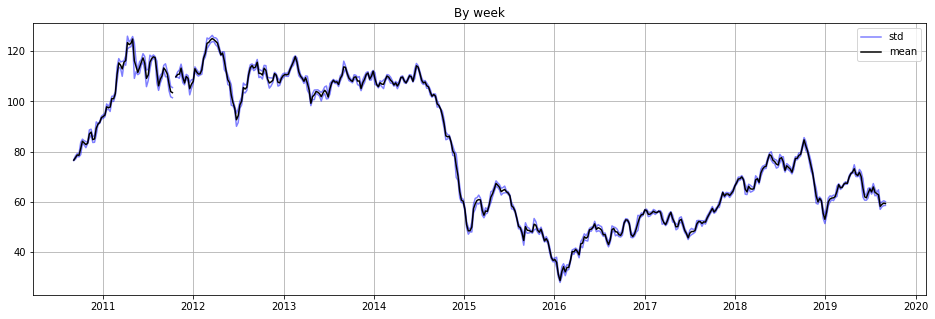

In [23]:
graph(df=df_brent_by_week, title='By week')

In [24]:
# by month
df_brent_by_month['Ср. значение'] = df_brent_by_day['Значение'].resample('M').mean()
df_brent_by_month['Ср. откланение'] = df_brent_by_day['Значение'].resample('M').std()
df_brent_by_month.head()

,Значение,Ср. значение,Ср. откланение
Дата,,,
2010-09-30,2112.16,78.228148,1.294269
2010-10-31,2170.31,83.473462,0.898559
2010-11-30,2240.63,86.178077,1.753625
2010-12-31,2398.04,92.232308,1.443311
2011-01-31,2425.83,97.033200,1.842147


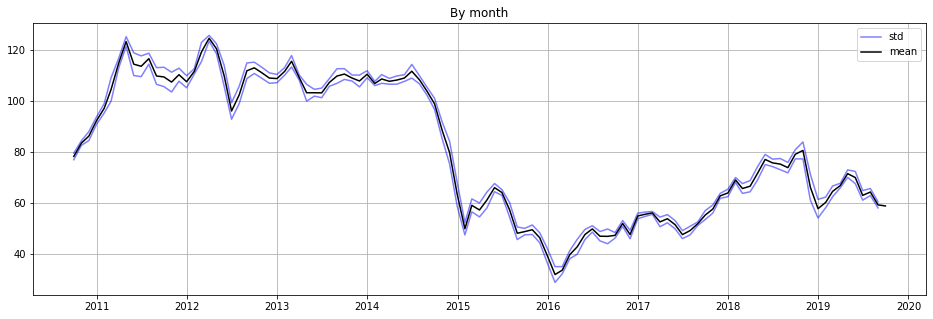

In [25]:
graph(df=df_brent_by_month, title='By month')

In [26]:
# by month
df_brent_by_year = df_brent_by_day.resample("Y").sum()
df_brent_by_year['Ср. значение'] = df_brent_by_day['Значение'].resample('Y').mean()
df_brent_by_year['Ср. откланение'] = df_brent_by_day['Значение'].resample('Y').std()

df_brent_by_year.head()

,Значение,Ср. значение,Ср. откланение
Дата,,,
2010-12-31,8921.14,84.963238,5.269065
2011-12-31,32673.83,110.758746,7.021114
2012-12-31,34527.02,111.377484,7.777702
2013-12-31,32224.86,108.137114,4.014836
2014-12-31,30228.39,99.435493,14.512923


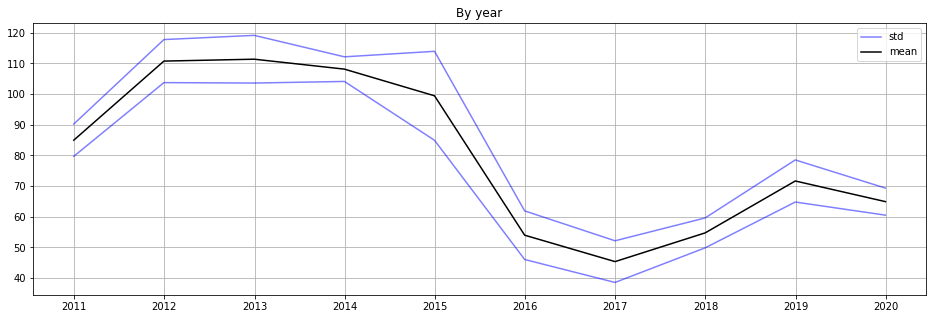

In [27]:
graph(df=df_brent_by_year, title='By year')

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовы

__Годовой график:__ 
- имеет самую плавную форму графика
- имеет самый широкий коредор среднеквадратического откланения
- по этому графику можно увидеть тенденцию движения цен

__Месячный график:__ 
- имеет более детальную форму графика
- имеет гораздо более узкий коредор среднеквадратического отклонения

__Неедельная график:__ 
- имеет самую динамичную форму графика
- имеет коредор среднеквадратического откланения почти сливается со средним значением
- обнаружился разрыв в графике в конце 2011 года